In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import data_table

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
data_table.DataTable(data.head(10))

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


> # Data cleaning

In [4]:
data.shape

(37022, 5)

In [5]:
data.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [6]:
data.describe()

,fips,cases,deaths
count,37022.000000,3.702200e+04,37022.000000
mean,32.054265,4.069580e+05,7347.578494
std,18.707117,6.795381e+05,11832.288550
min,1.000000,1.000000e+00,0.000000
25%,17.000000,2.439750e+04,484.000000
50%,31.000000,1.476040e+05,2572.000000
75%,46.000000,5.101880e+05,8801.000000
max,78.000000,5.560323e+06,76712.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37022 entries, 0 to 37021
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    37022 non-null  object
 1   state   37022 non-null  object
 2   fips    37022 non-null  int64 
 3   cases   37022 non-null  int64 
 4   deaths  37022 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


# Data analysis

In [8]:
data['date'].min()

'2020-01-21'

In [9]:
# to find the last data of update

max_date=data['date'].max()
max_date

'2022-01-02'

In [10]:
# Extracting the last date updated
data_table.enable_dataframe_formatter()

last_date=data[data['date']==max_date]
last_date

,date,state,fips,cases,deaths
36966,2022-01-02,Alabama,1,909541,16455
36967,2022-01-02,Alaska,2,156130,954
36968,2022-01-02,American Samoa,60,1,0
36969,2022-01-02,Arizona,4,1390409,24355
36970,2022-01-02,Arkansas,5,572822,9196
36971,2022-01-02,California,6,5560323,76712
36972,2022-01-02,Colorado,8,936422,10485
36973,2022-01-02,Connecticut,9,510188,9160
36974,2022-01-02,Delaware,10,186996,2286
36975,2022-01-02,District of Columbia,11,94286,1211


In [11]:
len(last_date)

56

In [12]:
# Acutal states and territory in United States

usa_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My work/United states 25 12 2021/us-states-territories 1.csv')
usa_data.head(100)

,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles)
0,State,Alabama,AL,Montgomery,NaN,"4,903,185","52,420"
1,State,Alaska,AK,Juneau,NaN,"731,545","665,384"
2,State,Arizona,AZ,Phoenix,NaN,"7,278,717","113,990"
3,State,Arkansas,AR,Little Rock,NaN,"3,017,804","53,179"
4,State,California,CA,Sacramento,NaN,"39,512,223","163,695"
...,...,...,...,...,...,...,...
60,Territory,Kingman Reef,NaN,NaN,NaN,NaN,0.005
61,Territory,Midway Atoll,NaN,NaN,NaN,NaN,3
62,Territory,Navassa Island,NaN,NaN,NaN,NaN,3
63,Territory,Palmyra Atoll,NaN,NaN,NaN,NaN,1.5


In [13]:
# Extracting only the states

usa_states=usa_data[usa_data['Type']=='State']
usa_states

,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles)
0,State,Alabama,AL,Montgomery,NaN,"4,903,185","52,420"
1,State,Alaska,AK,Juneau,NaN,"731,545","665,384"
2,State,Arizona,AZ,Phoenix,NaN,"7,278,717","113,990"
3,State,Arkansas,AR,Little Rock,NaN,"3,017,804","53,179"
4,State,California,CA,Sacramento,NaN,"39,512,223","163,695"
5,State,Colorado,CO,Denver,NaN,"5,758,736","104,094"
6,State,Connecticut,CT,Hartford,NaN,"3,565,278","5,543"
7,State,Delaware,DE,Dover,NaN,"973,764","2,489"
8,State,Florida,FL,Tallahassee,NaN,"21,477,737","65,758"
9,State,Georgia,GA,Atlanta,NaN,"10,617,423","59,425"


In [14]:
len(usa_states)

50

In [15]:
state_list=[]
for i in usa_states['Name']:
    state_list.append(i)

In [16]:
len(state_list)

50

In [17]:
#Reset the index to avoid the confusions

last_date=last_date.reset_index()
last_date

,index,date,state,fips,cases,deaths
0,36966,2022-01-02,Alabama,1,909541,16455
1,36967,2022-01-02,Alaska,2,156130,954
2,36968,2022-01-02,American Samoa,60,1,0
3,36969,2022-01-02,Arizona,4,1390409,24355
4,36970,2022-01-02,Arkansas,5,572822,9196
5,36971,2022-01-02,California,6,5560323,76712
6,36972,2022-01-02,Colorado,8,936422,10485
7,36973,2022-01-02,Connecticut,9,510188,9160
8,36974,2022-01-02,Delaware,10,186996,2286
9,36975,2022-01-02,District of Columbia,11,94286,1211


In [18]:
# filtering the actual states 

data_table.enable_dataframe_formatter()

dates=[]
state=[]
cases=[]
deaths=[]
for i in range(0,len(usa_states)):
    a=last_date[last_date['state']==state_list[i]]
    dt=a.iloc[0,1]
    st=a.iloc[0,2]
    cs=a.iloc[0,4]
    dth=a.iloc[0,5]
    dates.append(dt)
    state.append(st)
    cases.append(cs)
    deaths.append(dth)

In [19]:
#creating the final dataframe

final_data=pd.DataFrame({"Date":dates, "state":state, "Confirmed cases":cases,
                         "deaths":deaths
                         })
final_data

,Date,state,Confirmed cases,deaths
0,2022-01-02,Alabama,909541,16455
1,2022-01-02,Alaska,156130,954
2,2022-01-02,Arizona,1390409,24355
3,2022-01-02,Arkansas,572822,9196
4,2022-01-02,California,5560323,76712
5,2022-01-02,Colorado,936422,10485
6,2022-01-02,Connecticut,510188,9160
7,2022-01-02,Delaware,186996,2286
8,2022-01-02,Florida,4166392,62504
9,2022-01-02,Georgia,1798497,30283


In [20]:
len(final_data)

50

In [21]:
#To check the both data set are arranged in proper way to add further data to the final data

final_data[final_data['state']==usa_states['Name']]

,Date,state,Confirmed cases,deaths
0,2022-01-02,Alabama,909541,16455
1,2022-01-02,Alaska,156130,954
2,2022-01-02,Arizona,1390409,24355
3,2022-01-02,Arkansas,572822,9196
4,2022-01-02,California,5560323,76712
5,2022-01-02,Colorado,936422,10485
6,2022-01-02,Connecticut,510188,9160
7,2022-01-02,Delaware,186996,2286
8,2022-01-02,Florida,4166392,62504
9,2022-01-02,Georgia,1798497,30283


# **Note**
* From the previous result we can conclude that the final_data and usa_states are arrange in same manner.
* Now add some additional data to the final data like population, Abbreviation, area (square miles) and Capital

In [22]:
#Adding the additional informations

final_data['abbreviation']=usa_states['Abbreviation']
final_data['population']=usa_states['Population (2019)']
final_data['area (square miles)']=usa_states['area (square miles)']
final_data['capital']=usa_states['Capital']
final_data

,Date,state,Confirmed cases,deaths,abbreviation,population,area (square miles),capital
0,2022-01-02,Alabama,909541,16455,AL,"4,903,185","52,420",Montgomery
1,2022-01-02,Alaska,156130,954,AK,"731,545","665,384",Juneau
2,2022-01-02,Arizona,1390409,24355,AZ,"7,278,717","113,990",Phoenix
3,2022-01-02,Arkansas,572822,9196,AR,"3,017,804","53,179",Little Rock
4,2022-01-02,California,5560323,76712,CA,"39,512,223","163,695",Sacramento
5,2022-01-02,Colorado,936422,10485,CO,"5,758,736","104,094",Denver
6,2022-01-02,Connecticut,510188,9160,CT,"3,565,278","5,543",Hartford
7,2022-01-02,Delaware,186996,2286,DE,"973,764","2,489",Dover
8,2022-01-02,Florida,4166392,62504,FL,"21,477,737","65,758",Tallahassee
9,2022-01-02,Georgia,1798497,30283,GA,"10,617,423","59,425",Atlanta


# **Visualizations begins here**

In [23]:
#Rearranging the columns

rea=['Date','state','abbreviation','capital','area (square miles)','population','Confirmed cases','deaths']
final_data1=final_data[rea]
final_data1

,Date,state,abbreviation,capital,area (square miles),population,Confirmed cases,deaths
0,2022-01-02,Alabama,AL,Montgomery,"52,420","4,903,185",909541,16455
1,2022-01-02,Alaska,AK,Juneau,"665,384","731,545",156130,954
2,2022-01-02,Arizona,AZ,Phoenix,"113,990","7,278,717",1390409,24355
3,2022-01-02,Arkansas,AR,Little Rock,"53,179","3,017,804",572822,9196
4,2022-01-02,California,CA,Sacramento,"163,695","39,512,223",5560323,76712
5,2022-01-02,Colorado,CO,Denver,"104,094","5,758,736",936422,10485
6,2022-01-02,Connecticut,CT,Hartford,"5,543","3,565,278",510188,9160
7,2022-01-02,Delaware,DE,Dover,"2,489","973,764",186996,2286
8,2022-01-02,Florida,FL,Tallahassee,"65,758","21,477,737",4166392,62504
9,2022-01-02,Georgia,GA,Atlanta,"59,425","10,617,423",1798497,30283


In [24]:
#Extracting and storing the final data

final_data1.to_csv('/content/drive/MyDrive/Colab Notebooks/My work/United states 25 12 2021/Detailed_US_Covid_data.csv')

In [25]:
sort_data=final_data1.sort_values('Confirmed cases',ascending=False,axis=0)
sort_data

,Date,state,abbreviation,capital,area (square miles),population,Confirmed cases,deaths
4,2022-01-02,California,CA,Sacramento,"163,695","39,512,223",5560323,76712
42,2022-01-02,Texas,TX,Austin,"268,596","28,995,881",4581606,76062
8,2022-01-02,Florida,FL,Tallahassee,"65,758","21,477,737",4166392,62504
31,2022-01-02,New York,NY,Albany,"54,555","19,453,561",3617573,59152
12,2022-01-02,Illinois,IL,Springfield,"57,914","12,671,821",2154058,31017
37,2022-01-02,Pennsylvania,PA,Harrisburg,"46,054","12,801,989",2077224,36715
34,2022-01-02,Ohio,OH,Columbus,"44,826","11,689,100",2053721,29447
9,2022-01-02,Georgia,GA,Atlanta,"59,425","10,617,423",1798497,30283
21,2022-01-02,Michigan,MI,Lansing,"96,714","9,986,857",1706355,28984
32,2022-01-02,North Carolina,NC,Raleigh,"53,819","10,488,084",1685504,19436


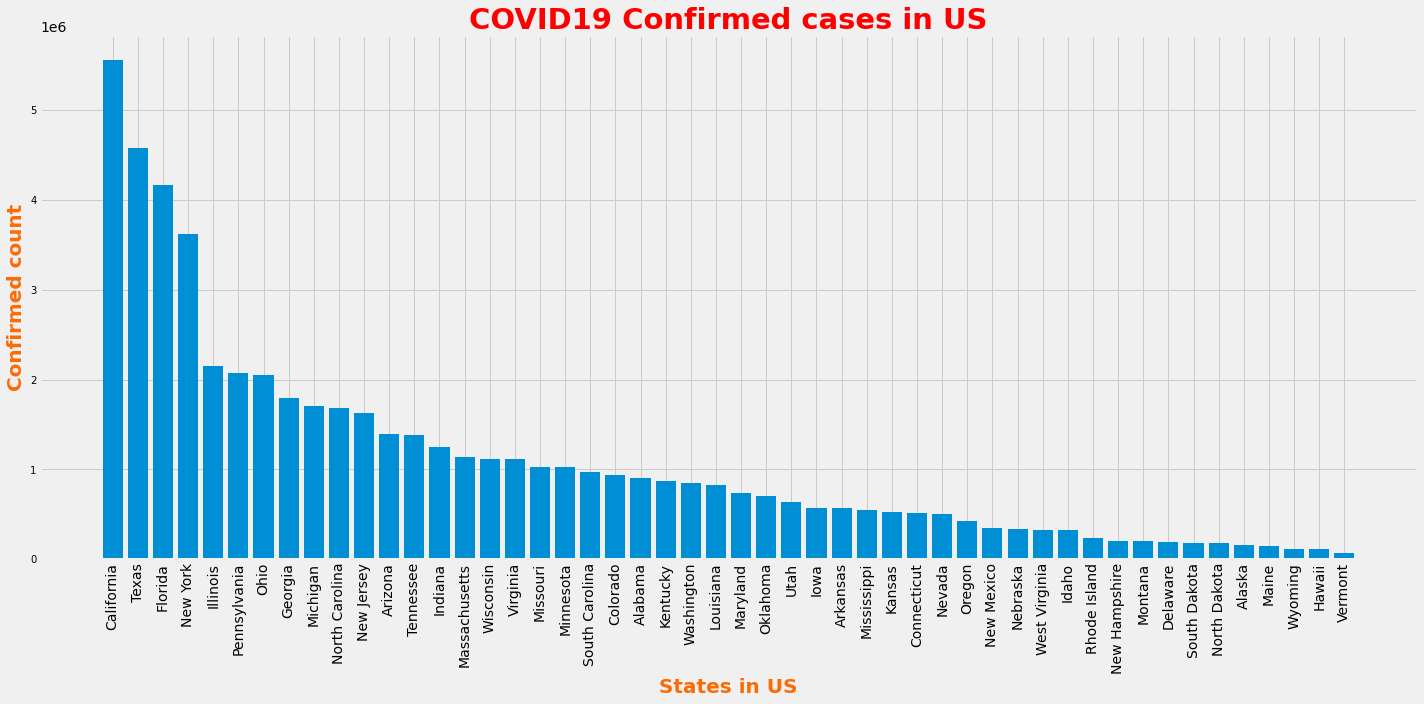

In [32]:
plt.figure(figsize=(20,10))

plt.style.use('fivethirtyeight')
plt.bar(sort_data['state'],sort_data['Confirmed cases'])
plt.title('COVID19 Confirmed cases in US',color='red',size=29,fontweight='bold')
plt.xlabel('States in US',color='#fc6b03',size=20,fontweight='bold')
plt.ylabel('Confirmed count',color='#fc6b03',size=20,fontweight='bold')
plt.xticks(sort_data['state'],rotation='vertical',size=14)
plt.yticks(size=10)

plt.tight_layout()

plt.show()

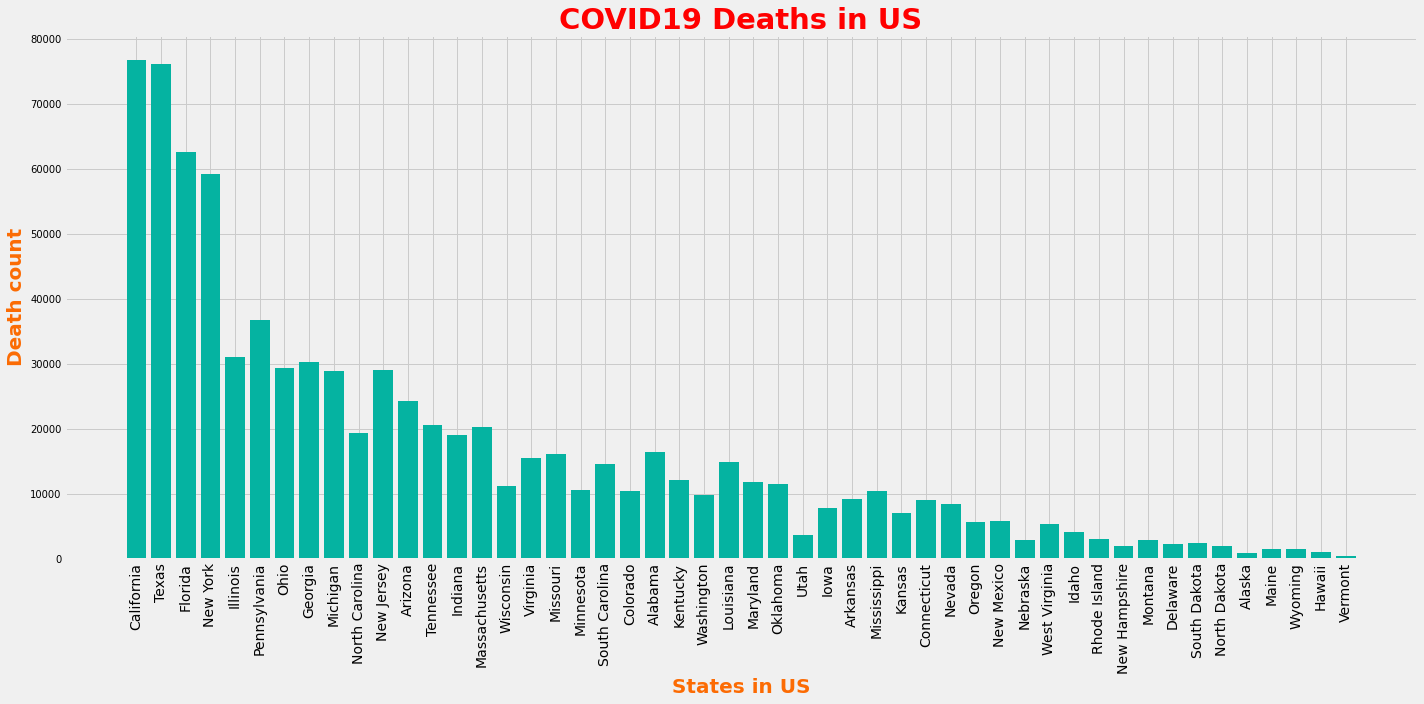

In [34]:
plt.figure(figsize=(20,10))

plt.style.use('fivethirtyeight')
plt.bar(sort_data['state'],sort_data['deaths'],color='#05b3a1')
plt.title('COVID19 Deaths in US',color='red',size=29,fontweight='bold')
plt.xlabel('States in US',color='#fc6b03',size=20,fontweight='bold')
plt.ylabel('Death count',color='#fc6b03',size=20,fontweight='bold')
plt.xticks(sort_data['state'],rotation='vertical',size=14)
plt.yticks(size=10)

plt.tight_layout()

plt.show()

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [35]:
sort_data.to_csv('/content/drive/MyDrive/Colab Notebooks/My work/United states 25 12 2021/sort_data.csv')